#Early Prediction of Diabetes Risk

##Problem Statement:
Diabetes is a major global health concern that affects millions of people every year. Early
detection can help individuals take preventive steps and manage their health better. This
project, use real-world health data from patients to build a machine learning model that
can predict whether a person is likely to have diabetes or not.The work on
data, like clean and prepare it, apply SMOTE to handle imbalance, and build a K-Nearest
Neighbors (KNN) classifier to make predictions. The goal is to not only improve technical
skills but also understand how data science can support important health decisions.

##Learning Objectives
• Explore and clean real-world health datasets to prepare for analysis

• Identify and treat data quality issues such as missing or irrelevant values

• Apply feature scaling techniques to prepare data for machine learning

• Implement oversampling using SMOTE to address class imbalance

• Build and train a K-Nearest Neighbors (KNN) classifier

• Evaluate model performance using accuracy, precision, recall, and F1 score

• Visualize insights using plots like histograms, pair plots, and heatmaps

• Interpret results to derive meaningful conclusions about diabetes risk factors

##Step 1 : Importing the Libraries
To prepare Python environment by loading the essential tools (called libraries) that
help to work with data, perform calculations, and create beautiful graphs.

In [28]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix

##Step 2: Load CSV
To load a real-world dataset (about diabetes patients) directly from a web link and make it
ready for analysis in project.

In [2]:
df=pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/diabetes-data.csv')

##Step 3: First Five Rows of Data
By view the top few rows (usually 5) of the dataset so it can help to get a basic idea of what
information is included, what each column represents, and whether the data looks clean
and complete.

In [3]:
df.head() #View first 5 data entries of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Step 4: Check Dataset Structure
To get a quick and complete summary of the dataset so it can help to understand how many
people (rows) are in it, what kind of data each column contains, and whether any
information is missing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Step 5: Summary Statistics
To quickly understand the data in each column — including how values are distributed,
what the average is, and whether anything looks unusual or needs cleaning.

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Step 6: Create a Safe Copy and Prepare Important Columns
By making a safe copy of dataset so it don’t accidentally damage the original, and to
focus on a few important health-related columns for cleaning and analysis.

In [6]:
# Make a safe copy of the original dataset
df_copy = df.copy()

# Select important health-related columns
health_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_health = df_copy[health_columns]

# Display the first few rows of the selected health data
df_health.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


##Step 7 : Checking for Missing Values
To identify which parts of the data are missing or empty so that we can clean the data
properly before building any machine learning model.

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##Step 8: Visualizing Data Distributions with Histograms
Help to understand the spread and distribution of values for each feature (column) in
the diabetes dataset by using histogram charts. These charts gives a visual idea of what
the data looks like, what’s common, and what might be unusual.

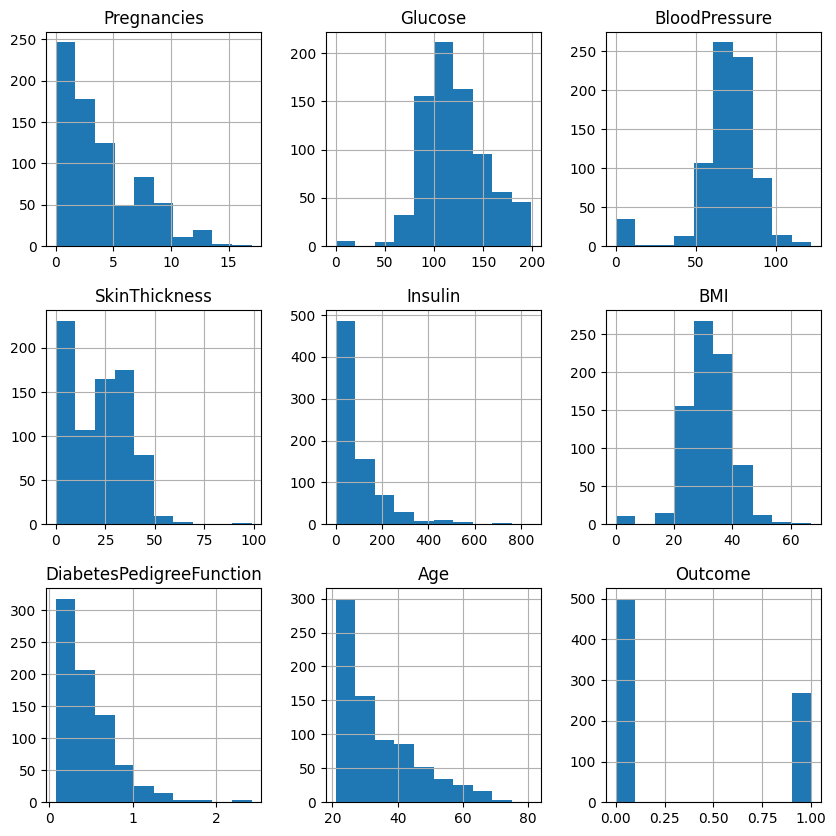

In [8]:
hist=df.hist(figsize=(10,10))

##Step 9: Fix Zero Values & Understand Data
Sometimes, our dataset has zero values in columns where 0 doesn't make real-world sense
— like in this dataset min values of BMI, blood pressure, insulin etc are 0. These are likely errors or missing data. In this
step, we’ll replace those unrealistic zero values with more reasonable values, and then
draw graphs (histograms) to see how the data looks.

In [9]:
invalid_zeros=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in invalid_zeros:
  median=df[col].median()
  df[col]=df[col].replace(0,median)

##Step 10: Check the Size of Dataset
To find out how many rows (people) and columns (health information types) are present in
the dataset.

In [10]:
df.shape

(768, 9)

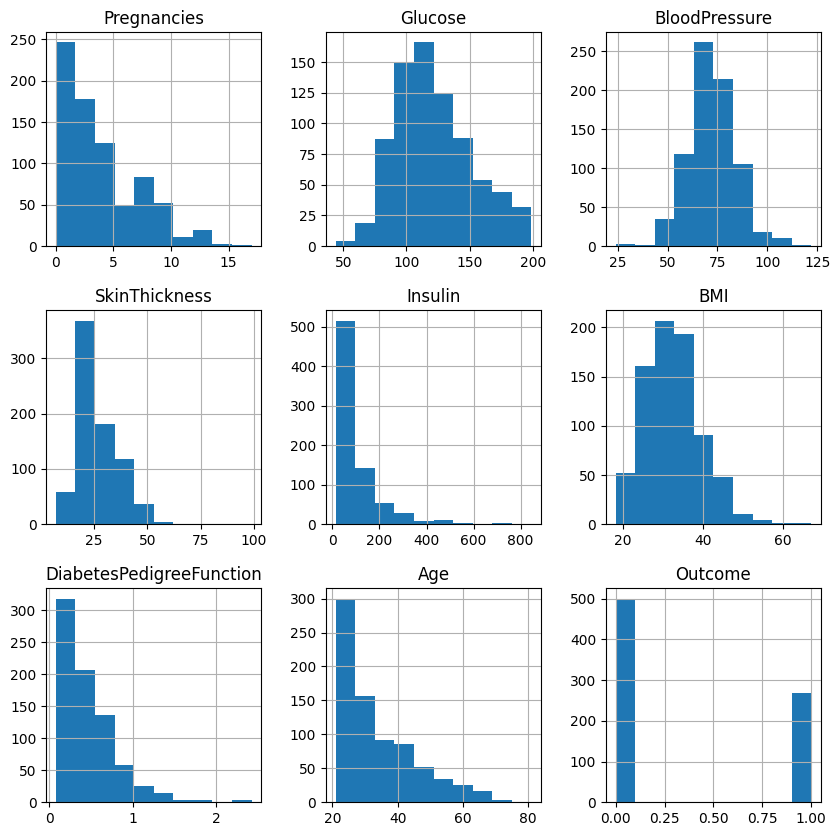

In [11]:
histafter=df.hist(figsize=(10,10))

In [12]:
df.describe() #Check whether the values are filled by Median or not

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##Step 11: Check How Many People Have Diabetes
To find out how many people in the dataset have diabetes and how many do not by making value counts of outcome that represent the 0 and 1 value 0 is for non diabetes and 1 is for diabetes

In [13]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


##Step 12: Plot Scatter Matrix
To find out how many people in the dataset have diabetes and how many do not.For example, If you see dots forming a straight line, it may mean the two variables are strongly
related.If the dots are spread out randomly, those variables may not be related.

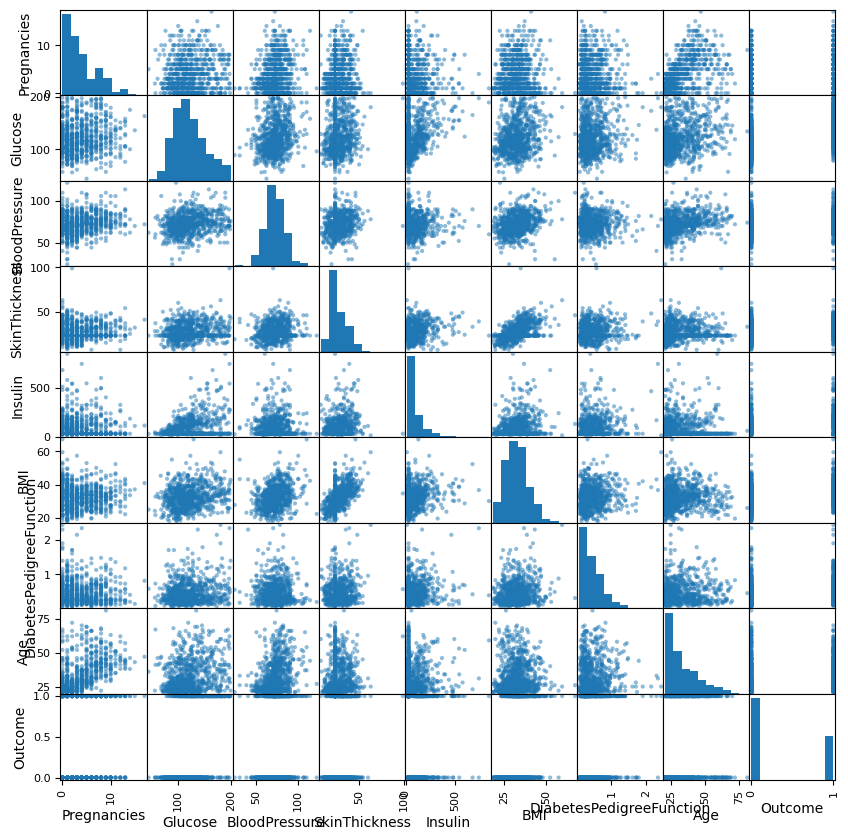

In [14]:
scatter_matrix(df, figsize=(10, 10));

##Step 13: Plot Scatter Matrix (With `hue=outcome`)
To understand how different health factors are related to each other, and how these
relationships differ between people with and without diabetes.

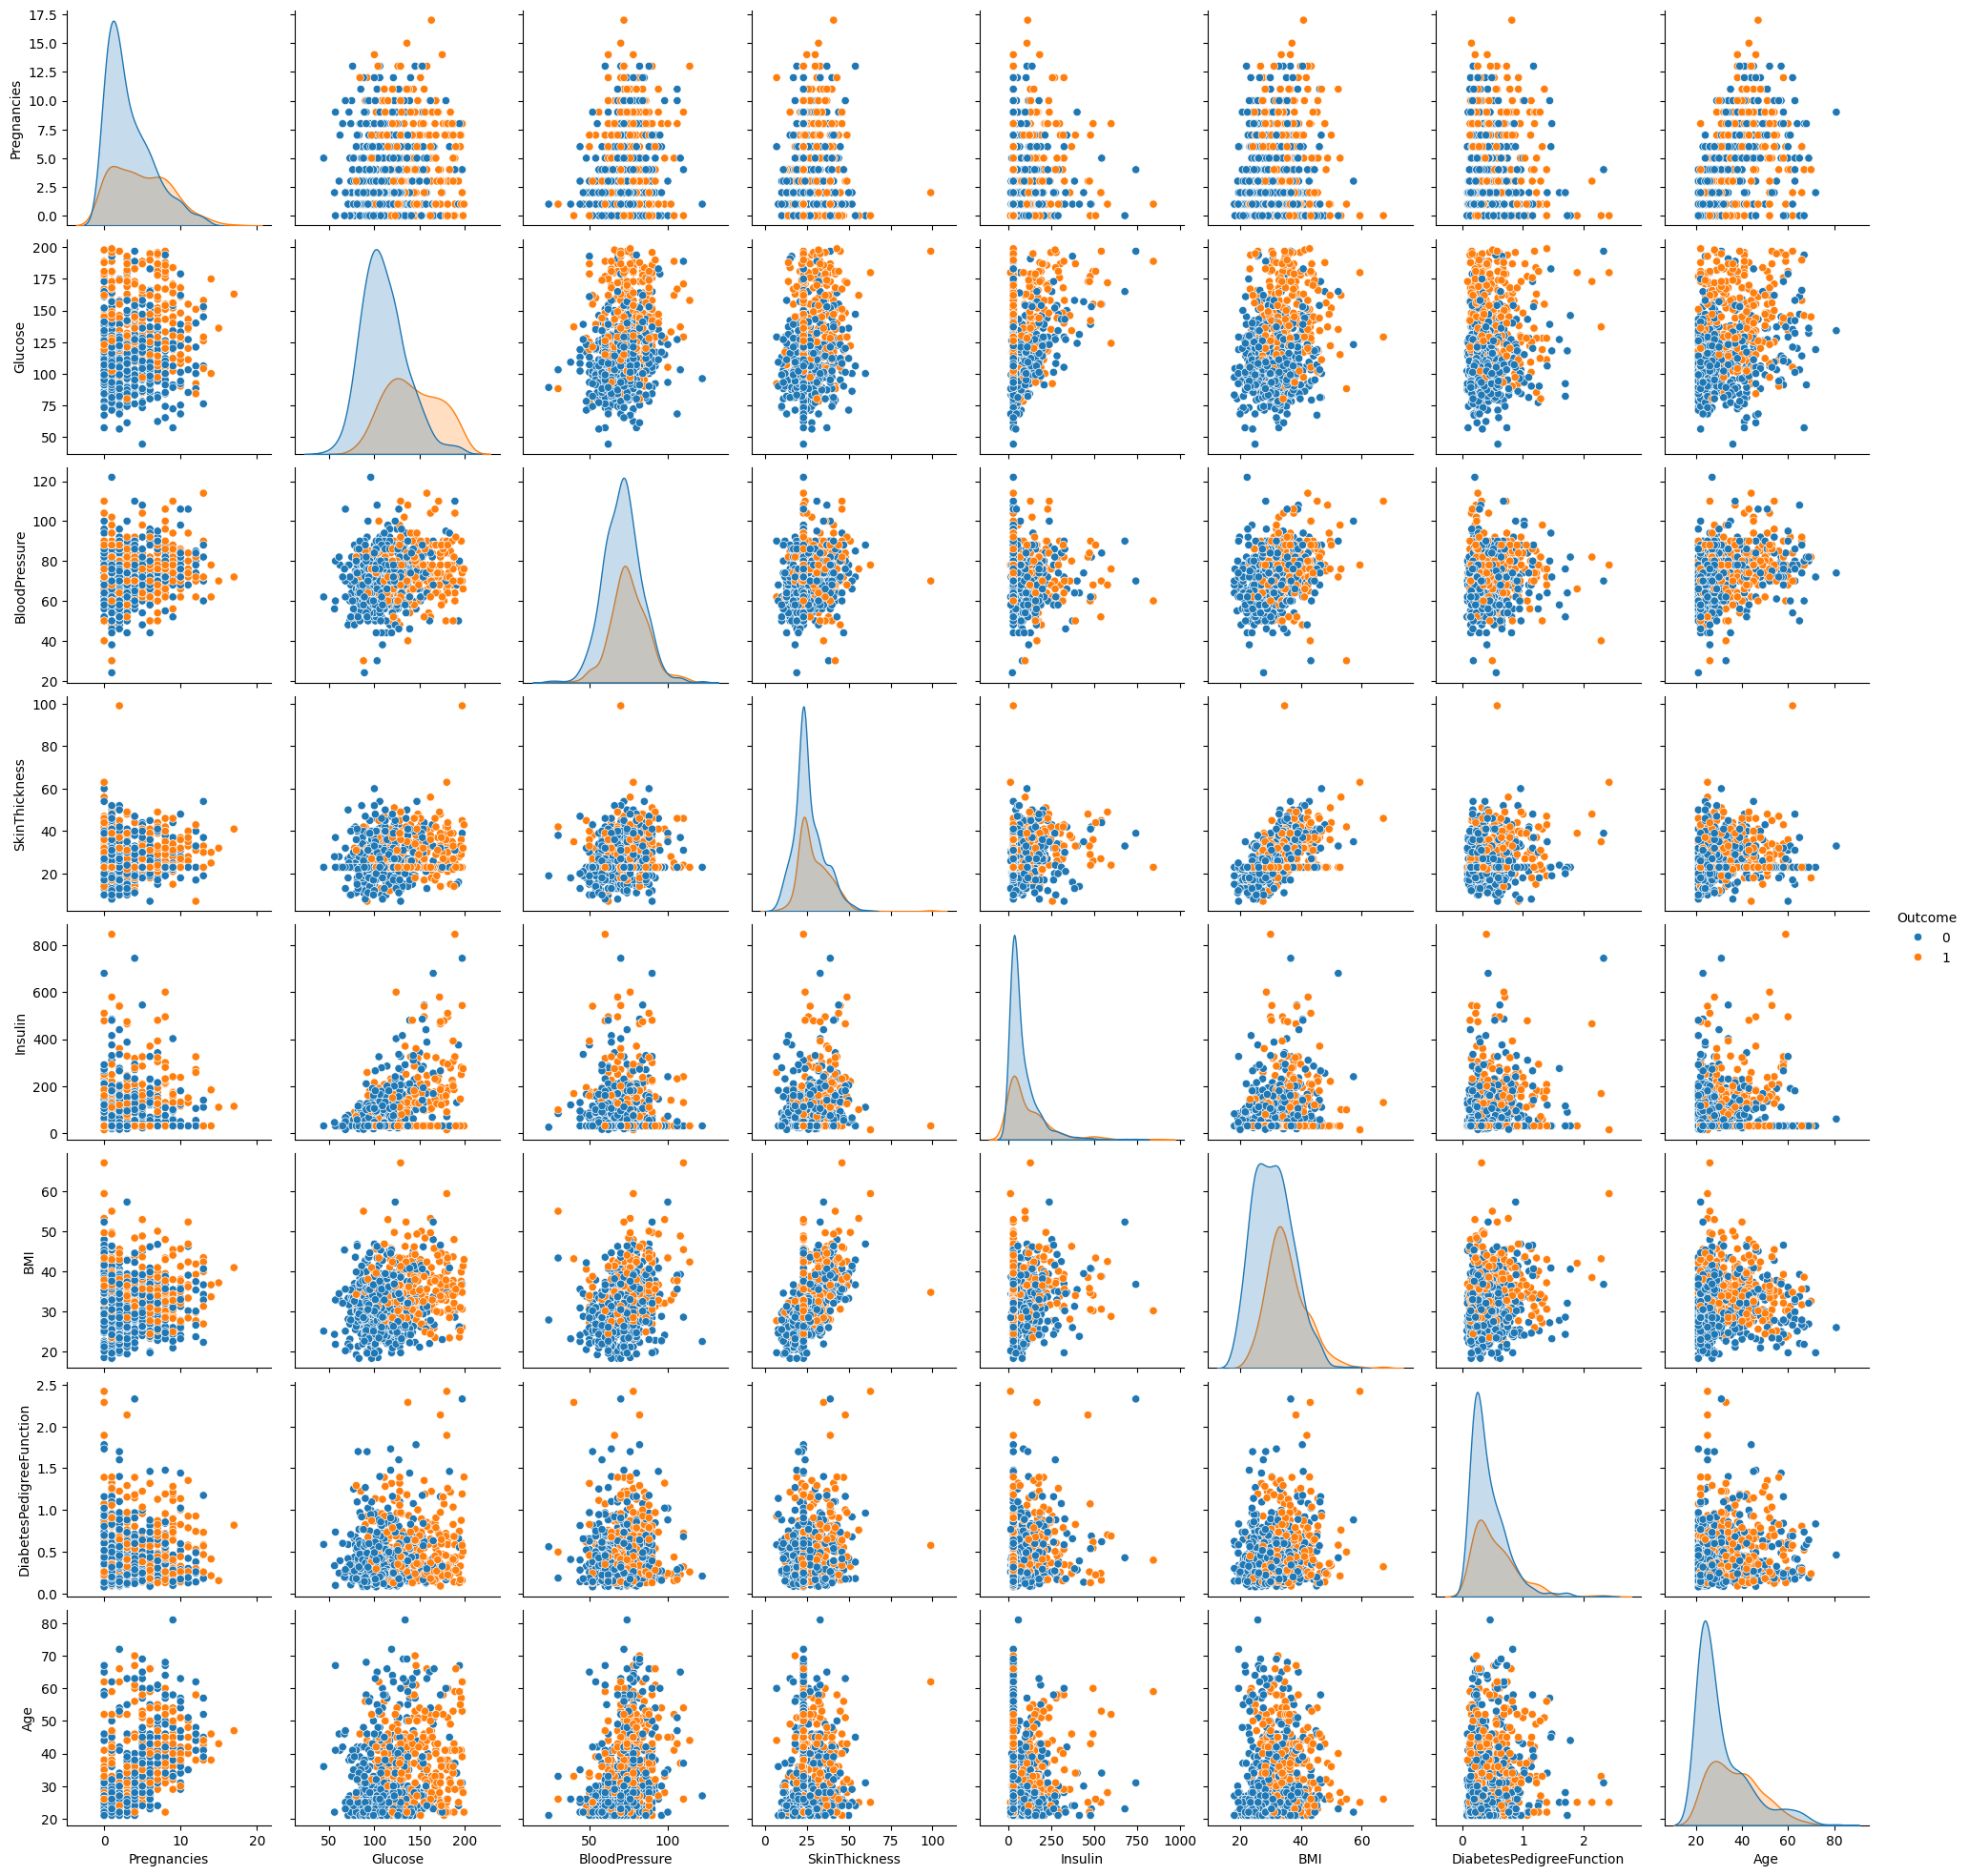

In [15]:
sns.pairplot(df, hue="Outcome")
plt.show()

##Step 14: Plot a Heatmap
To understand how different health-related features are related to each other and to the
diabetes outcome using a color-coded visual map (heatmap).

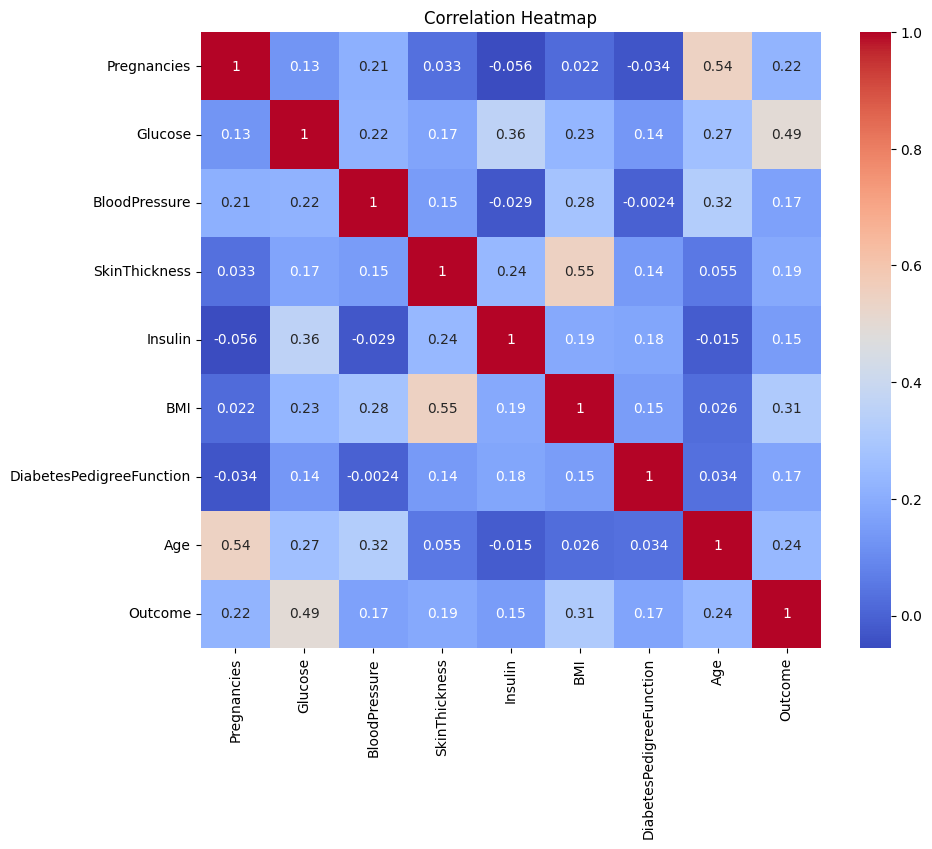

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
X=df.drop(columns='Outcome')
y=df['Outcome']

##Step 15: Scaling the Data Before Modeling
Prepare the health dataset for machine learning by scaling the data, so that all health
measurements are on a similar scale.

In [18]:
sc=StandardScaler()
sc.fit_transform(df)

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.01666174, -0.69376149, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.47378505,
        -0.87137393, -0.73212021]])

##Step 16: Test Train Data Split
We want to divide our dataset into two parts:

• One part to train the machine (learn from existing data)

• Another part to test the machine (check how well it has learned)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

##Step 17: Balancing the Dataset using SMOTE
To balance the training data so that both diabetic and non-diabetic cases are equally
represented. This helps the machine learning model learn from both classes fairly.

In [20]:
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [21]:
y_train.value_counts()

,count
Outcome,
0,400
1,400


##Step 18: Finding the Best K for KNN Classifier
In this we will explore how changing the number of neighbors (called k) affects the
performance of a K-Nearest Neighbors (KNN) classification model.

In [22]:
# Store accuracy for each value of K
k_range = range(1, 21)
scores = []

# Try K from 1 to 20
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Best K
best_k = k_range[scores.index(max(scores))]
print(f"Best K is {best_k} with accuracy of {max(scores):.2f}")

Best K is 1 with accuracy of 0.73


##Step 19: Find the Best Training and Testing Score in KNN
Now find the best K value for the KNN model based on testing accuracy. It then trains a KNN model using this best K and calculates and prints the accuracy on both the training and testing datasets. This helps to assess the model's performance and check for overfitting.

In [23]:
best_k = k_range[scores.index(max(scores))]

# Train the model with the best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = knn_best.predict(X_train)
y_test_pred = knn_best.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print(f"Best K: {best_k}")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Best K: 1
Training Accuracy: 1.00
Testing Accuracy: 0.73


##Step 20: Plotting Training vs Testing Accuracy (KNN)

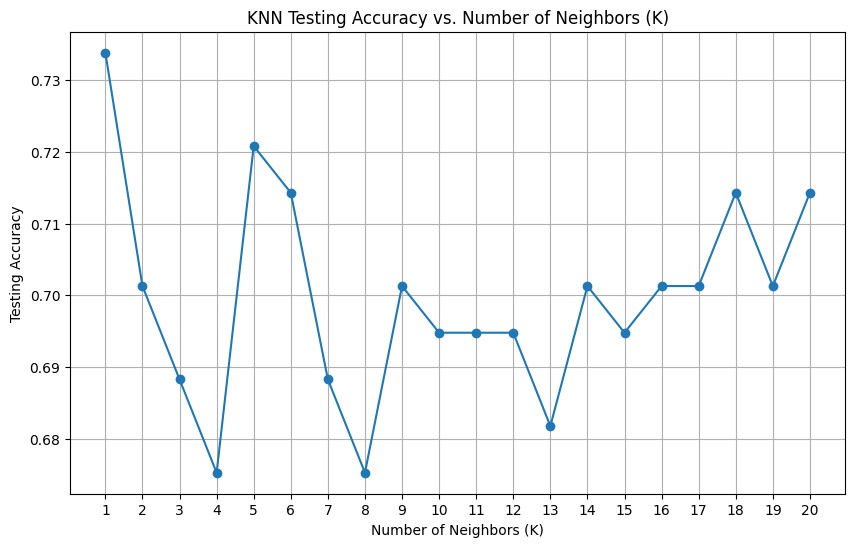

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Testing Accuracy')
plt.title('KNN Testing Accuracy vs. Number of Neighbors (K)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### KNN Accuracy vs. Number of Neighbors (K)

This line plot shows how testing accuracy changes with different values of K in the K-Nearest Neighbors algorithm.

- Highest accuracy (73%) at K = 1
- Accuracy drops sharply after K = 1 and stabilizes
- Lower K values may capture patterns better, while higher K values might underfit


##Step 21: Evaluating the Final Model with K-Nearest Neighbors (KNN)

In [25]:
# Use the best K found
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Evaluate the final model
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

Accuracy: 0.7337662337662337

Confusion Matrix:
 [[82 18]
 [23 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



- The model performs better on Class 0 it means not having diabetes.
- Lower recall for Class 1 suggests many false negatives.
- Overall, the model is moderately accurate but needs improvement in detecting Class 1 cases.

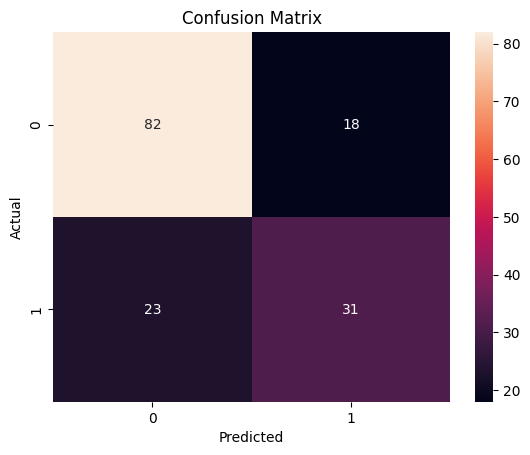

In [26]:
# Plotting the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Step 22: Calculating Precision, Recall, and F1 Score

In [29]:
# Calculate Precision
precision = precision_score(y_test, y_pred_final)

# Calculate Recall
recall = recall_score(y_test, y_pred_final)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_final)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.63
Recall: 0.57
F1 Score: 0.60


- Precision (0.63): 63% of the predicted positive cases were actually correct.
- Recall (0.57): The model correctly identified 57% of the actual positive cases.
- F1 Score (0.60): A balance between precision and recall; shows moderate performance on positive class.


##Conclusion:

Data Preparation and Cleaning: During the initial analysis, it was observed that several critical health parameters contained zero values. These were addressed by replacing them with the median, helping to improve the overall data quality.

Handling Class Imbalance: A noticeable imbalance existed between the number of diabetic and non-diabetic cases. To counter this, the SMOTE technique was applied to the training set, ensuring a more balanced dataset and improving the model’s ability to generalize.

Model Evaluation: The KNN classifier demonstrated a test accuracy of around 73%. Metrics such as precision, recall, and F1-score added further insight into how well the model performed, especially in detecting positive diabetes cases.

Exploratory Insights: Visual tools like the scatter plot matrix and correlation heatmap helped uncover preliminary patterns between features and the target variable. These observations pave the way for deeper investigation into which features play the most significant role in predicting diabetes.